# Stock Market Analysis with Python with Monte Carlo Simulation

In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. I will use pandas to get stock information, visualize different aspects of our data, analyze the risk of a stock based on its previous performance history, and predict future stock prices through a Monte Carlo method!

I'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks' closing prices?

5.) What was the correlation between different stocks' daily returns?

6.) How much value do we put at risk by investing in a particular stock?

7.) How can we attempt to predict future stock behavior?

### Import python packages and datasets

In [73]:
# For manipulating datasets
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader.data as web

# For time stamps
from datetime import datetime

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

Use Yahoo and pandas to grab data for some tech stocks.

In [74]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
# We're grabbing a year's worth of data
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting each as a dataframe
for stock in tech_list:
    globals()[stock]=web.DataReader(stock,'yahoo',start,end)

### Step 2: Generate descriptive statistics using .head(), .describe(), and .info()

In [75]:
# We're working with 4 datasets that have the same format
# let's start with AAPL to get an understanding what our datasets look like
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-03,196.500000,193.149994,193.250000,195.350006,23271800.0,192.826111
2019-04-04,196.369995,193.139999,194.789993,195.690002,19114300.0,193.161682
2019-04-05,197.100006,195.929993,196.449997,197.000000,18526600.0,194.454758
2019-04-08,200.229996,196.339996,196.419998,200.100006,25881700.0,197.514709
2019-04-09,202.850006,199.229996,200.320007,199.500000,35768200.0,196.922470


In [76]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,241.419094,236.203976,238.480944,239.014724,3.238379e+07,237.839819
std,43.548367,42.275123,42.783322,43.111395,1.729470e+07,43.680784
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.719727
25%,204.955002,201.650005,203.162502,203.155003,2.117318e+07,201.394157
50%,226.955002,221.824997,224.935005,224.169998,2.697120e+07,222.984741
75%,270.949997,265.370010,267.427505,268.320007,3.597765e+07,267.684708
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,327.200012


In [77]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-04-03 to 2020-04-03
Data columns (total 6 columns):
High         254 non-null float64
Low          254 non-null float64
Open         254 non-null float64
Close        254 non-null float64
Volume       254 non-null float64
Adj Close    254 non-null float64
dtypes: float64(6)
memory usage: 13.9 KB


### Step 3: Exploratory Data Analysis

Text(0, 0.5, 'Price per share')

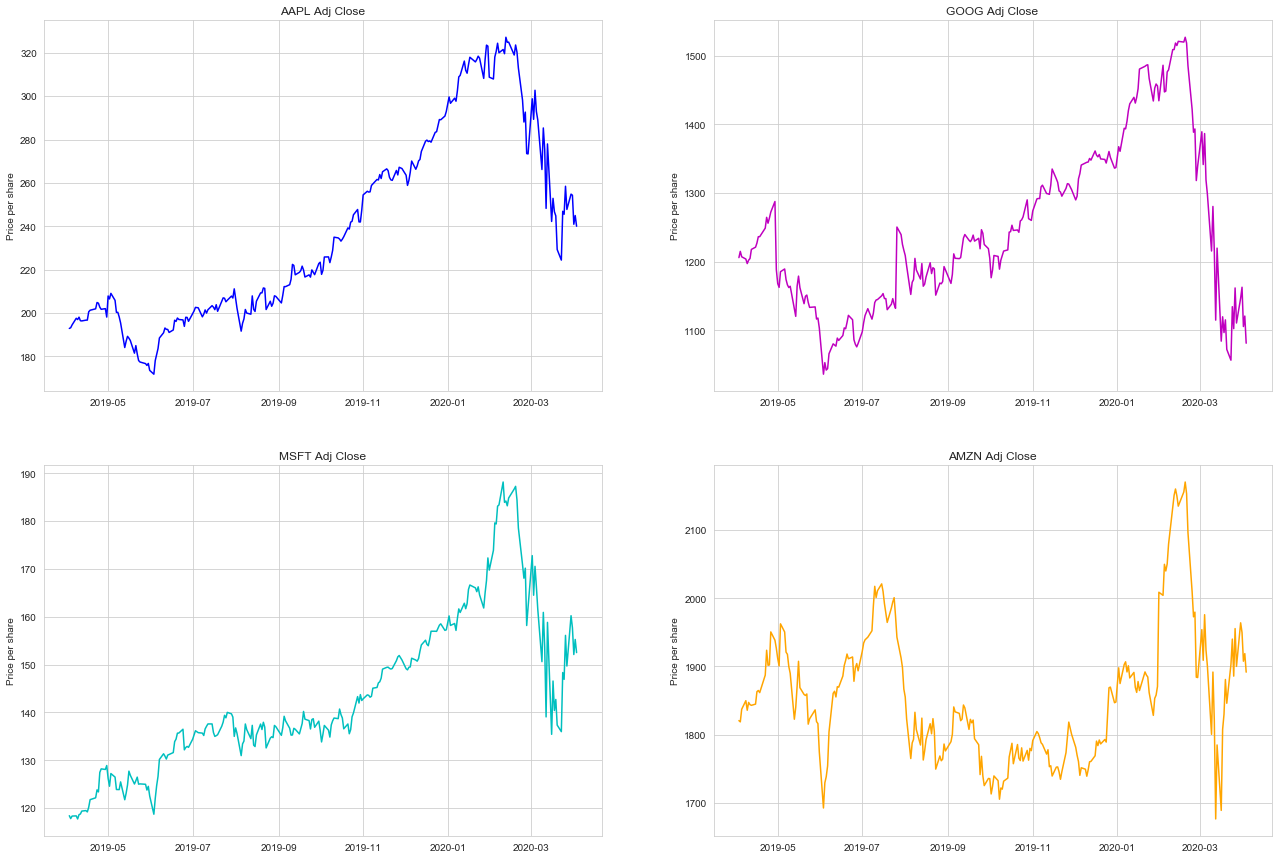

In [78]:
# Let's view the historical closing prices for each stock
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(22, 15))

axes[0, 0].plot(AAPL.index, AAPL['Adj Close'],color='blue')
axes[0, 0].set_title('AAPL Adj Close')
axes[0, 0].set_ylabel('Price per share')

axes[0, 1].plot(GOOG.index, GOOG['Adj Close'], color='m')
axes[0, 1].set_title('GOOG Adj Close')
axes[0, 1].set_ylabel('Price per share')

axes[1, 0].plot(MSFT.index, MSFT['Adj Close'], color='c')
axes[1, 0].set_title('MSFT Adj Close')
axes[1, 0].set_ylabel('Price per share')

axes[1, 1].plot(AMZN.index, AMZN['Adj Close'], color='orange')
axes[1, 1].set_title('AMZN Adj Close')
axes[1, 1].set_ylabel('Price per share')

#### Let's look at the total volume traded each day for the past year next

Text(0, 0.5, 'number of shares traded')

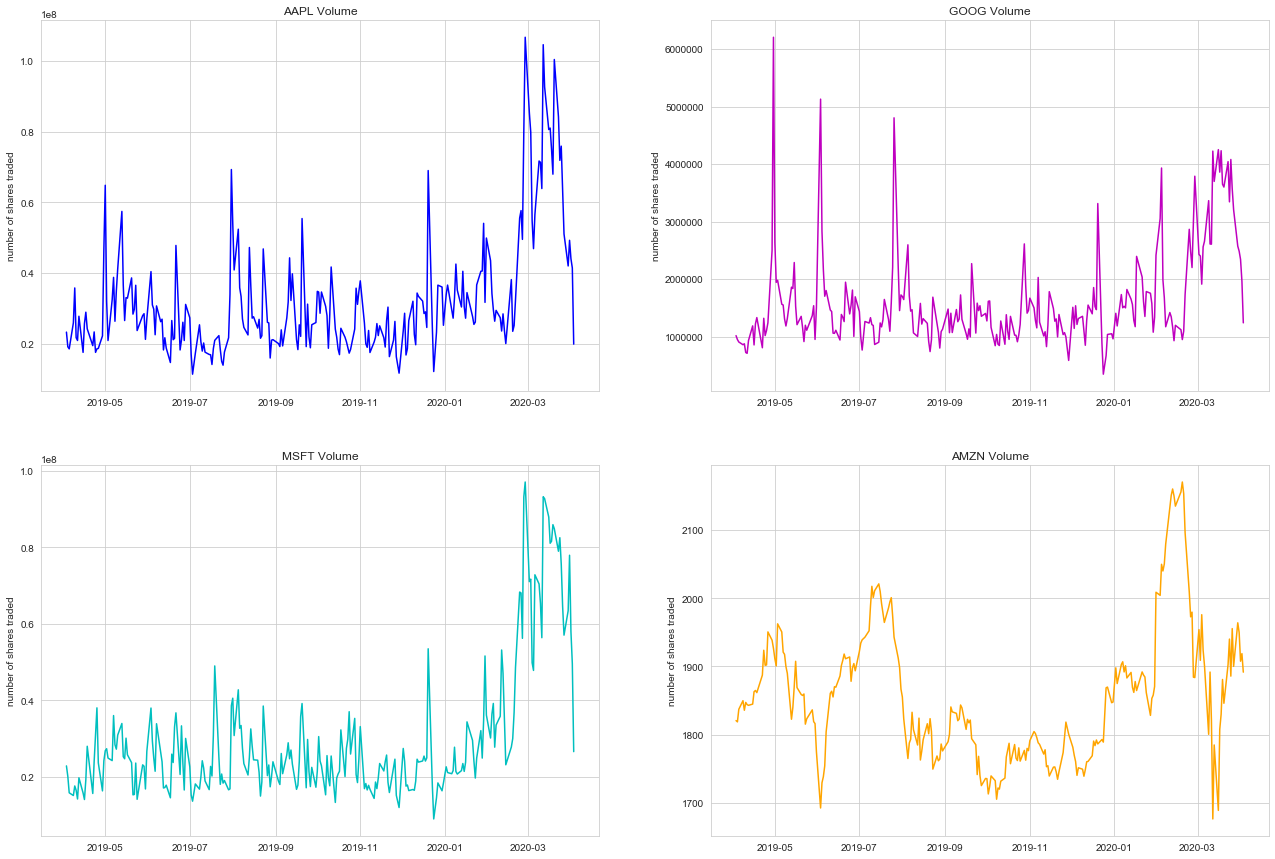

In [79]:
# Let's view the historical daily trading volumes for each stock
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(22, 15))

axes[0, 0].plot(AAPL.index, AAPL['Volume'], color='blue')
axes[0, 0].set_title('AAPL Volume')
axes[0, 0].set_ylabel('number of shares traded')

axes[0, 1].plot(GOOG.index, GOOG['Volume'], color='m')
axes[0, 1].set_title('GOOG Volume')
axes[0, 1].set_ylabel('number of shares traded')

axes[1, 0].plot(MSFT.index, MSFT['Volume'], color='c')
axes[1, 0].set_title('MSFT Volume')
axes[1, 0].set_ylabel('number of shares traded')

axes[1, 1].plot(AMZN.index, AMZN['Adj Close'], color='orange')
axes[1, 1].set_title('AMZN Volume')
axes[1, 1].set_ylabel('number of shares traded')

#### Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

In [80]:
# Use pandas built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]
l1 = [AAPL, GOOG, MSFT, AMZN]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    for i in l1:
        i[column_name]=i['Adj Close'].rolling(ma).mean()

Text(0, 0.5, 'Price per share')

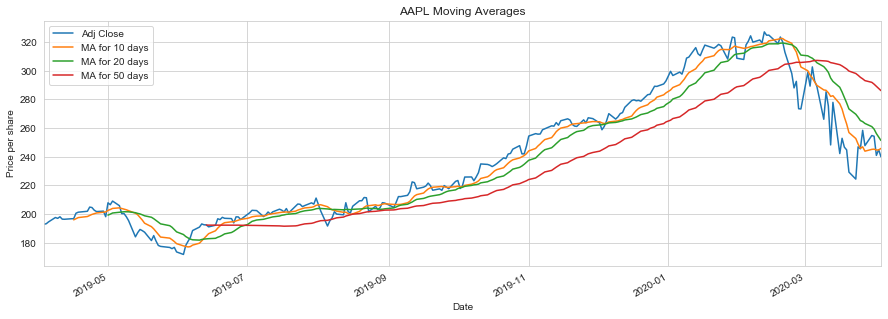

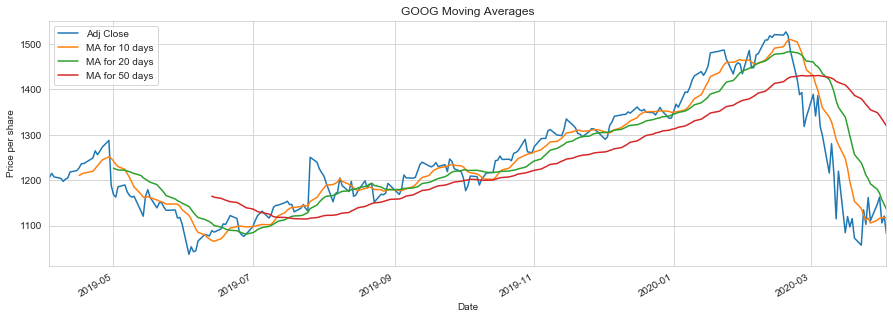

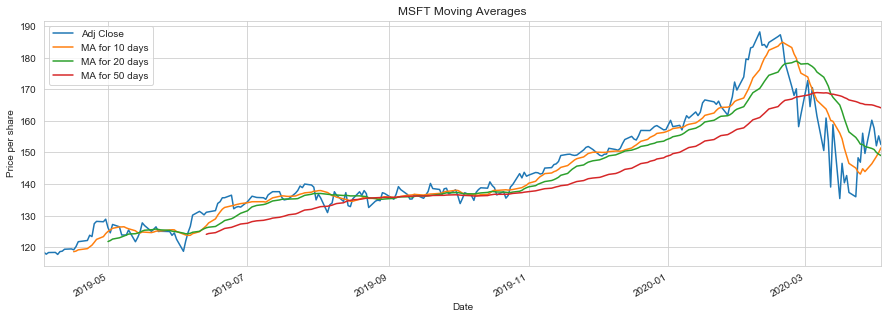

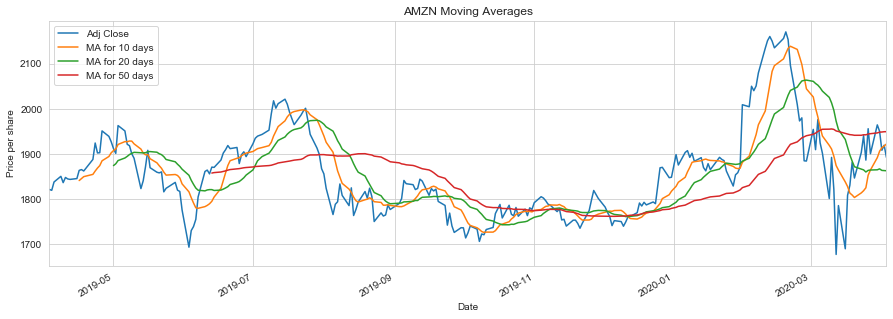

In [81]:
# Let's view the moving averages for each stock

AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(15,5))
plt.title('AAPL Moving Averages')
plt.ylabel('Price per share')

GOOG[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(15,5))
plt.title('GOOG Moving Averages')
plt.ylabel('Price per share')

MSFT[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(15,5))
plt.title('MSFT Moving Averages')
plt.ylabel('Price per share')

AMZN[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(15,5))
plt.title('AMZN Moving Averages')
plt.ylabel('Price per share')

#### Part 2 - Daily Return Analysis

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock. We'll use pandas to retrieve the daily returns for each stock.

Text(0, 0.5, 'daily return')

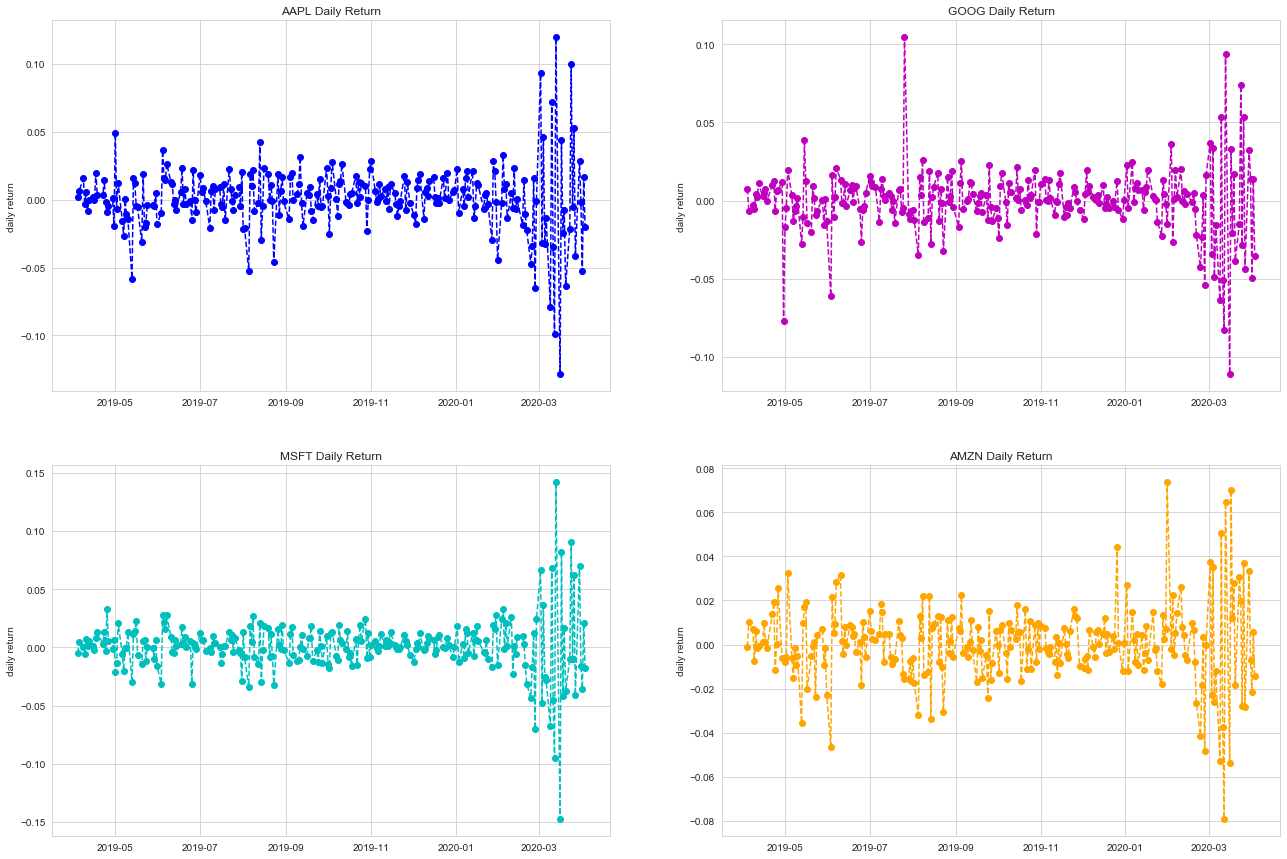

In [82]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()

figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(22, 15))

axes[0, 0].plot(AAPL.index, AAPL['Daily Return'],linestyle='--',marker='o', color='blue')
axes[0, 0].set_title('AAPL Daily Return')
axes[0, 0].set_ylabel('daily return')

axes[0, 1].plot(GOOG.index, GOOG['Daily Return'],linestyle='--',marker='o', color='m')
axes[0, 1].set_title('GOOG Daily Return')
axes[0, 1].set_ylabel('daily return')

axes[1, 0].plot(MSFT.index, MSFT['Daily Return'],linestyle='--',marker='o', color='c')
axes[1, 0].set_title('MSFT Daily Return')
axes[1, 0].set_ylabel('daily return')

axes[1, 1].plot(AMZN.index, AMZN['Daily Return'],linestyle='--',marker='o', color='orange')
axes[1, 1].set_title('AMZN Daily Return')
axes[1, 1].set_ylabel('daily return')

Now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

Text(0.5, 1.0, 'AMZN Daily Return')

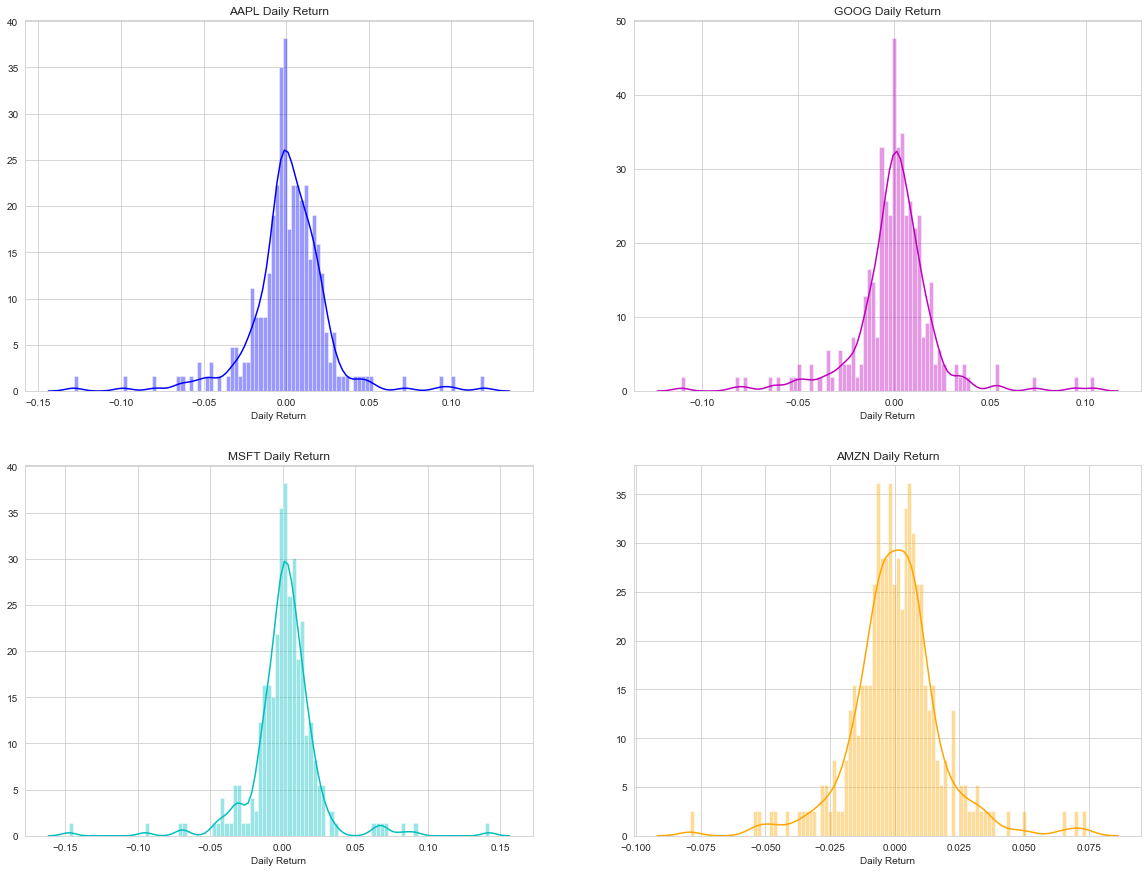

In [83]:
# Set up the matplotlib figure
figure, axes = plt.subplots(2, 2, figsize=(20, 15), sharex=False)

sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='blue', ax=axes[0,0])
axes[0, 0].set_title('AAPL Daily Return')

sns.distplot(GOOG['Daily Return'].dropna(),bins=100,color='m', ax=axes[0,1])
axes[0, 1].set_title('GOOG Daily Return')

sns.distplot(MSFT['Daily Return'].dropna(),bins=100,color='c', ax=axes[1,0])
axes[1, 0].set_title('MSFT Daily Return')

sns.distplot(AMZN['Daily Return'].dropna(),bins=100,color='orange', ax=axes[1,1])
axes[1, 1].set_title('AMZN Daily Return')

##### Let's build a DataFrame with all the ['Adj Close'] columns for each of the stocks dataframes to analyze the returns of all the stocks in our list

In [84]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = web.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [85]:
# Let's take a quick look
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-04-03,192.826111,1820.699951,1205.920044,118.403458
2019-04-04,193.161682,1818.859985,1215.000000,117.801422
2019-04-05,194.454758,1837.280029,1207.150024,118.324493
2019-04-08,197.514709,1849.859985,1203.839966,118.363968
2019-04-09,196.922470,1835.839966,1197.250000,117.722450


In [86]:
# Make a new tech returns DataFrame for the pct_change
tech_rets = closing_df.pct_change()

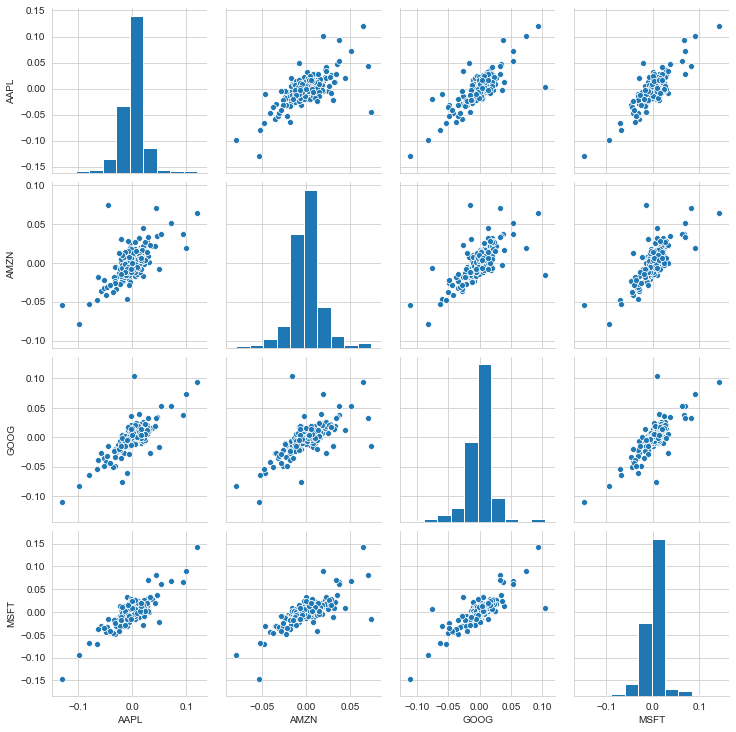

In [87]:
# Call pairplot on our DataFrame for an automatic visual analysis of all possible correlations
sns.pairplot(tech_rets.dropna())

##### Above we can see all the relationships on daily returns between all the stocks. It might be interesting to investigate each individual comaprison as most relationship look fairly correlated

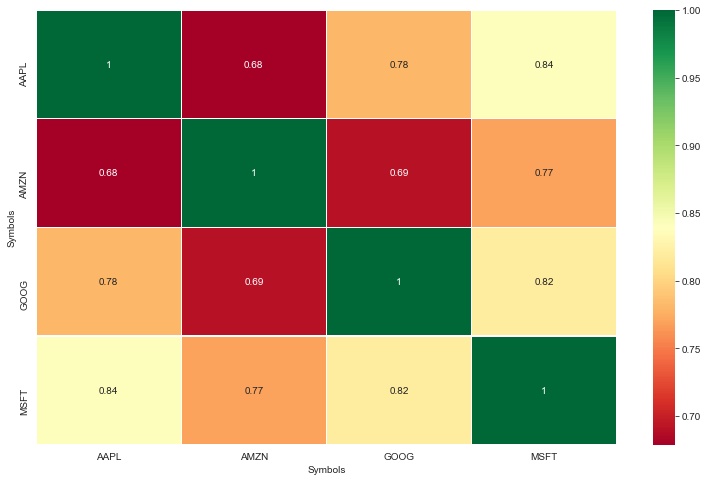

In [88]:
plt.figure(figsize = (13,8))
sns.heatmap(tech_rets.corr(), annot=True, cmap="RdYlGn",linewidths=.5)

As you may have suspected, these tech companies are all positively correlated with MFST and AAPL having the  strongest correlation.

### Step 4: Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

Text(75, 0, 'AMZN')

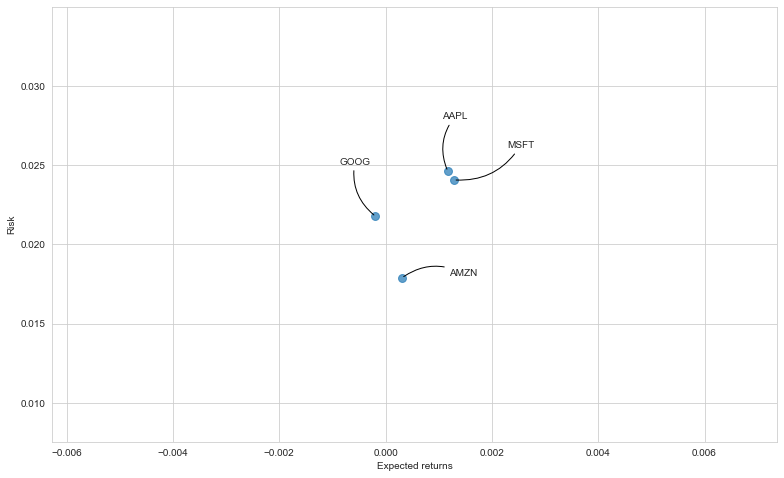

In [89]:
# Reminder of what tech_rets is
# closing_df is adj close prices of each stock
# tech_rets = closing_df.pct_change()

# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

#define area of circles on plot so they are visible
area = np.pi*20

plt.figure(figsize = (13,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.7,s =area)

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

plt.annotate(
        'MSFT', 
        xy = (rets.MSFT.mean(), rets.MSFT.std()), xytext = (80, 30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3', color='black'))
plt.annotate(
        'AAPL', 
        xy = (rets.AAPL.mean(), rets.AAPL.std()), xytext = (20, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0.3', color='black'))
plt.annotate(
        'GOOG', 
        xy = (rets.GOOG.mean(), rets.GOOG.std()), xytext = (-5, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0.3', color='black'))
plt.annotate(
        'AMZN', 
        xy = (rets.AMZN.mean(), rets.AMZN.std()), xytext = (75, 0),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0.3', color='black'))


#### Value at Risk

Let's define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could  expect to lose (putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. 

##### Value at risk using the "bootstrap" method

For this method we will calculate the empirical quantiles from a histogram of daily returns

Text(0.5, 1.0, 'AMZN Daily Return')

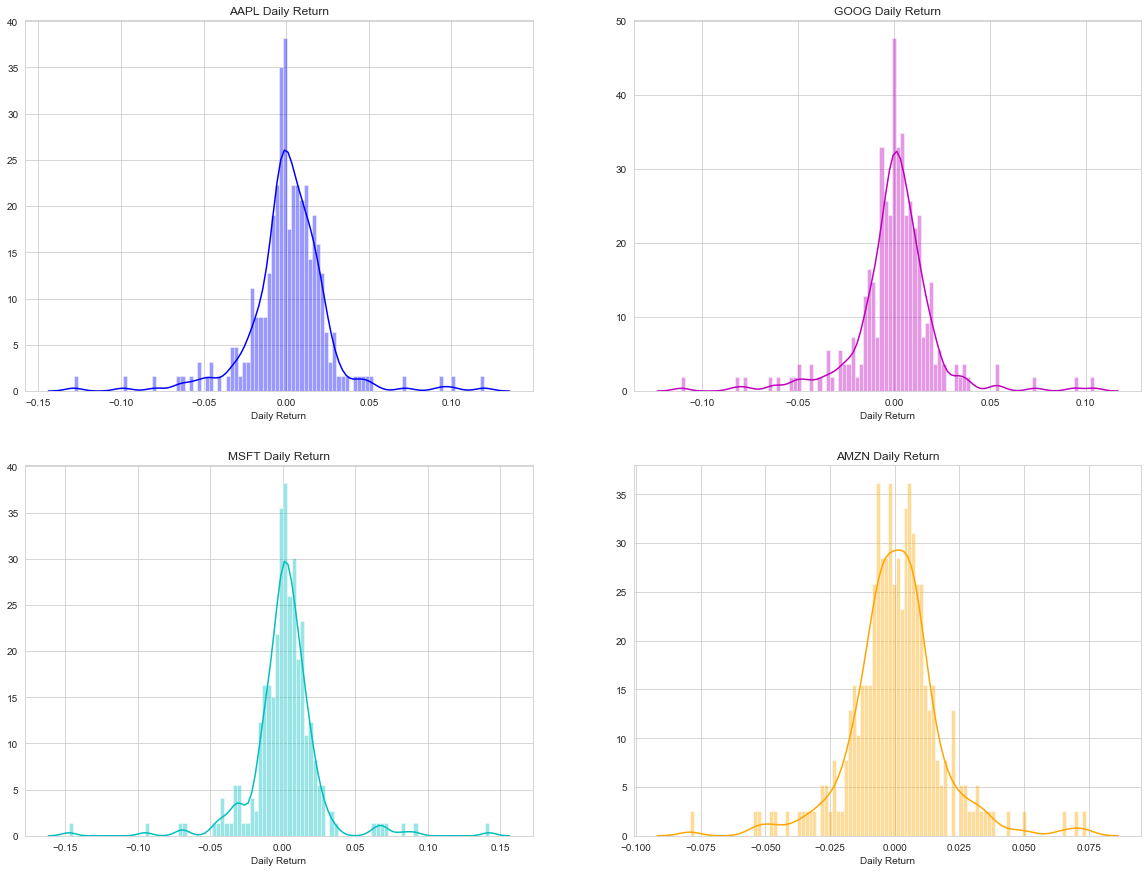

In [90]:
# Set up the matplotlib figure
figure, axes = plt.subplots(2, 2, figsize=(20, 15), sharex=False)

sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='blue', ax=axes[0,0])
axes[0, 0].set_title('AAPL Daily Return')

sns.distplot(GOOG['Daily Return'].dropna(),bins=100,color='m', ax=axes[0,1])
axes[0, 1].set_title('GOOG Daily Return')

sns.distplot(MSFT['Daily Return'].dropna(),bins=100,color='c', ax=axes[1,0])
axes[1, 0].set_title('MSFT Daily Return')

sns.distplot(AMZN['Daily Return'].dropna(),bins=100,color='orange', ax=axes[1,1])
axes[1, 1].set_title('AMZN Daily Return')

Now we can use quantile to get the risk value for the stock.

In [91]:
# The 0.05 empirical quantile of daily returns for each stock
# remember that the rets DataFrame contains the pct_change for each stock's 'adj close' price
aapl_eq = round(rets['AAPL'].quantile(0.05), 3)
goog_eq = round(rets['GOOG'].quantile(0.05), 3)
msft_eq = round(rets['MSFT'].quantile(0.05), 3)
amzn_eq = round(rets['AMZN'].quantile(0.05), 3)

print(f'The 0.05 empirical quantile of daily returns for Apple is at {aapl_eq}. \n That means that with 95% confidence, our worst daily loss will not exceed {round(abs(aapl_eq)*100,1)}%. \n If we have a 1 million dollar investment, our one-day 5% VaR is {abs(aapl_eq)} * 1,000,000 = ${round(abs(aapl_eq)*1000000,1)}. \n')

print(f'The 0.05 empirical quantile of daily returns for Google is at {goog_eq}. \n That means that with 95% confidence, our worst daily loss will not exceed {round(abs(goog_eq)*100,1)}%. \n If we have a 1 million dollar investment, our one-day 5% VaR is {abs(goog_eq)} * 1,000,000 = ${round(abs(goog_eq)*1000000,1)}. \n')

print(f'The 0.05 empirical quantile of daily returns for Microsoft is at {msft_eq}. \n That means that with 95% confidence, our worst daily loss will not exceed {round(abs(msft_eq)*100,1)}%. \n If we have a 1 million dollar investment, our one-day 5% VaR is {abs(msft_eq)} * 1,000,000 = ${round(abs(msft_eq)*1000000,1)}. \n')

print(f'The 0.05 empirical quantile of daily returns for Amazon is at {amzn_eq}. \n That means that with 95% confidence, our worst daily loss will not exceed {round(abs(amzn_eq)*100,1)}%. \n If we have a 1 million dollar investment, our one-day 5% VaR is {abs(amzn_eq)} * 1,000,000 = ${round(abs(amzn_eq)*1000000,1)}. \n')

The 0.05 empirical quantile of daily returns for Apple is at -0.034. 
 That means that with 95% confidence, our worst daily loss will not exceed 3.4%. 
 If we have a 1 million dollar investment, our one-day 5% VaR is 0.034 * 1,000,000 = $34000.0. 

The 0.05 empirical quantile of daily returns for Google is at -0.035. 
 That means that with 95% confidence, our worst daily loss will not exceed 3.5%. 
 If we have a 1 million dollar investment, our one-day 5% VaR is 0.035 * 1,000,000 = $35000.0. 

The 0.05 empirical quantile of daily returns for Microsoft is at -0.032. 
 That means that with 95% confidence, our worst daily loss will not exceed 3.2%. 
 If we have a 1 million dollar investment, our one-day 5% VaR is 0.032 * 1,000,000 = $32000.0. 

The 0.05 empirical quantile of daily returns for Amazon is at -0.027. 
 That means that with 95% confidence, our worst daily loss will not exceed 2.7%. 
 If we have a 1 million dollar investment, our one-day 5% VaR is 0.027 * 1,000,000 = $27000.0. 

#### Value at Risk using the Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

$$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$ 

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

$$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$ 

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

First we'll define our Monte Carlo function

In [92]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Then we'll define the variables we'll be using the Microsoft DataFrame MSFT

In [93]:
# Set up our time horizon
days = 30

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we
mu = rets.mean()['MSFT']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['MSFT']

Text(0.5, 1.0, 'Monte Carlo Analysis for Microsoft')

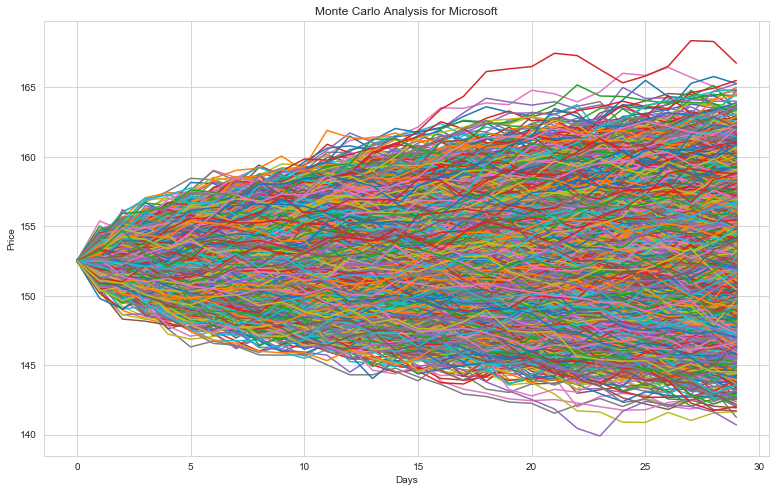

In [94]:
# Get start price from MSFT DataFrame
start_price = MSFT['Adj Close'].loc[str(datetime.today())[:10]]

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

# Set plot size
plt.figure(figsize = (13,8))

for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];
    # plot each simulation
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Microsoft')

The plot the above displays each simulation over the course of 30 days

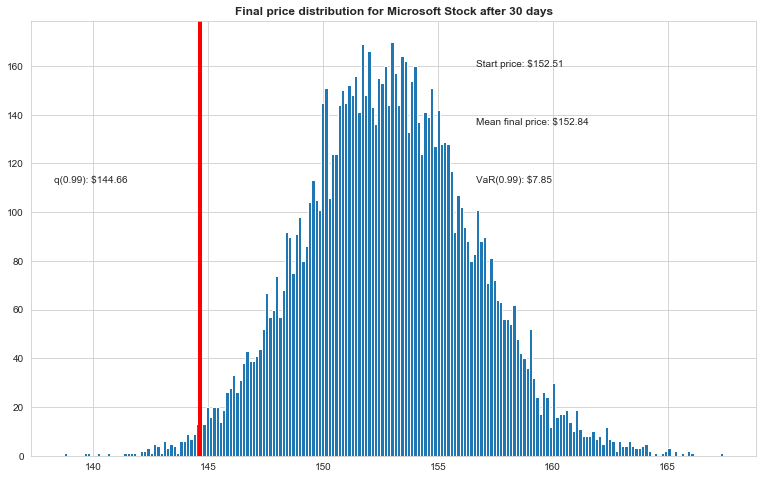

In [95]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)

# Set plot size
plt.figure(figsize = (13,8))

# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Microsoft Stock after %s days" % days, weight='bold');

In [96]:
print(f"This basically mean for every initial stock you purchase you're putting about ${round(start_price - q,2)} at risk 99% of the time from our Monte Carlo Simulation.")

This basically mean for every initial stock you purchase you're putting about $7.85 at risk 99% of the time from our Monte Carlo Simulation.


Now, we can change our variables and run simulations for each of our stocks if we wanted to 